In [40]:
import nibabel as nib
import numpy as np
from sympy im

In [249]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

In [265]:
class Tri():
    
    def __init__(self, coords):
        
        self.min_coords = coords.min(axis=0)
        self.max_coords = coords.max(axis=0)
        
    def intersect(self, other):
        
        if other.min_coords[0] > self.min_coords[0] and other.max_coords[0] < self.max_coords[0]:
            if other.min_coords[1] > self.min_coords[1] and other.max_coords[1] < self.max_coords[1]:
                if other.min_coords[2] > self.min_coords[2] and other.max_coords[2] < self.max_coords[2]:
                    return True
        return False

In [266]:
compare = Tri(new_coords[new_tris[0]])

for i in range(len(cur_tris)):
    
    t = Tri(cur_coords[cur_tris[i]])
    if compare.intersect(t):
        print(i)
    

219405
219406
219407
219408


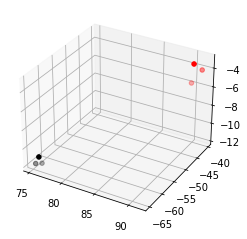

In [331]:
ax = plt.axes(projection='3d')
xdata, ydata, zdata = new_coords[new_tris[0]].T
ax.scatter3D(xdata, ydata, zdata, c='Red')

xdata, ydata, zdata = cur_coords[cur_tris[1112]].T
ax.scatter3D(xdata, ydata, zdata, c='Black')

plt.show()

In [330]:
a = new_coords[new_tris[0]]
b = cur_coords[cur_tris[1112]]

a_p = Plane(Point3D(a[0]), Point3D(a[1]), Point3D(a[2]))

np.mean([float(a_p.distance(Point3D(b[0]))),
         float(a_p.distance(Point3D(b[1]))),
         float(a_p.distance(Point3D(b[2])))])

3.9782939851416472

In [ ]:
def resample(metricIn, curSphere='fsaverage_std_sphere.L.164k_fsavg_L.surf.gii',
             newSphere='fs_LR-deformed_to-fsaverage.L.sphere.32k_fs_LR.surf.gii',
             curAreaSurf='fsaverage.L.midthickness_va_avg.164k_fsavg_L.shape.gii',
             newAreaSurf='fs_LR.L.midthickness_va_avg.32k_fs_LR.shape.gii'):
    
    # Load geo
    curSphere = nib.load(curSphere)
    newSphere = nib.load(newSphere)
    
    # Load area metrics
    curAreaSurf = nib.load(curAreaSurf)
    newAreaSurf = nib.load(newAreaSurf)
    
    # Un-pack and get areas for current
    cur_coords = curSphere.agg_data('NIFTI_INTENT_POINTSET')
    cur_tris = curSphere.agg_data('NIFTI_INTENT_TRIANGLE')
    cur_areas = compute_areas(cur_tris, cur_coords)
   
    # Un-pack and get areas for new
    new_coords = newSphere.agg_data('NIFTI_INTENT_POINTSET')
    new_tris = newSphere.agg_data('NIFTI_INTENT_TRIANGLE')
    new_areas = compute_areas(new_tris, new_coords)
    
    # Do input checks
    
    # Init metric_out empty array
    
    # Init surface sampler helper

In [ ]:
def resample_surface(cur_coords, new_coords, cur_areas, new_areas):
    
    # Gen changed radius coords
    cur_coords_mod = change_radius(cur_coords, 100)
    new_coords_mod = change_radius(new_coords, 100)
    
    # Compute weights adap bary area
    computeWeightsAdapBaryArea(&currentSphereMod, &newSphereMod, currentAreas, newAreas, currentRoi);

       


In [ ]:
# Returns forward mapping, want to gen forward and backwards mapping
forward = make_mapping(currentSphereMod, newSphereMod)
backward = make_mapping(newSphereMod, currentSphereMod) 



In [159]:
from scipy.interpolate import barycentric_interpolate

In [ ]:
barycentric_interpolate(cur_coords[0], )

In [168]:
np.where(cur_tris == 1)


(array([    12,     13, 288314, 292687, 307997]), array([0, 0, 2, 1, 2]))

In [ ]:
# Passed single coord
# From is first generated from currentSphereMod
# which inits the signed distance helper
# then one by one, processes coords from 

In [149]:
class Oct():
    
    def __init__(self, minCoord, maxCoord):
        
        self.minCoord = minCoord
        self.maxCoord = maxCoord

class SignedDistanceHelperBase():
    
    def __init__(self, coords, tris):
        
        self.min_coord = coords.min(axis=0)
        self.max_coord = coords.max(axis=0)
        
        self.m_indexRoot = Oct(minCoord, maxCoord)
        
        self.myCoordData = coords
        self.m_coordList = coords


        
        

In [ ]:
SignedDistanceHelperBase::SignedDistanceHelperBase(const SurfaceFile* mySurf)
{

    m_topoHelp = mySurf->getTopologyHelper();
    
    
    const float* myBB = mySurf->getBoundingBox()->getBounds();
    
    Vector3D minCoord, maxCoord;
    minCoord[0] = myBB[0]; maxCoord[0] = myBB[1];
    minCoord[1] = myBB[2]; maxCoord[1] = myBB[3];
    minCoord[2] = myBB[4]; maxCoord[2] = myBB[5];
    
    
    m_indexRoot.grabNew(new Oct<TriVector>(minCoord, maxCoord));
    
    const float* myCoordData = mySurf->getCoordinateData();
    
    
    m_numNodes = mySurf->getNumberOfNodes();
    int32_t numNodes3 = m_numNodes * 3;
    m_coordList.resize(numNodes3);
    
    for (int32_t i = 0; i < numNodes3; ++i)
    {
        m_coordList[i] = myCoordData[i];
    }
    
    
    m_numTris = mySurf->getNumberOfTriangles();
    m_triangleList.resize(m_numTris * 3);
    
    for (int32_t i = 0; i < m_numTris; ++i)
    {
        int32_t i3 = i * 3;
        const int32_t* thisTri = mySurf->getTriangle(i);
        
        m_triangleList[i3] = thisTri[0];
        m_triangleList[i3 + 1] = thisTri[1];
        m_triangleList[i3 + 2] = thisTri[2];
        
        maxCoord = minCoord = myCoordData + thisTri[0] * 3;//set both to the coordinates of the first node in the triangle
        for (int j = 1; j < 3; ++j)
        {
            int32_t thisNode3 = thisTri[j] * 3;
            if (myCoordData[thisNode3] < minCoord[0]) minCoord[0] = myCoordData[thisNode3];
            if (myCoordData[thisNode3 + 1] < minCoord[1]) minCoord[1] = myCoordData[thisNode3 + 1];
            if (myCoordData[thisNode3 + 2] < minCoord[2]) minCoord[2] = myCoordData[thisNode3 + 2];
            if (myCoordData[thisNode3] > maxCoord[0]) maxCoord[0] = myCoordData[thisNode3];
            if (myCoordData[thisNode3 + 1] > maxCoord[1]) maxCoord[1] = myCoordData[thisNode3 + 1];
            if (myCoordData[thisNode3 + 2] > maxCoord[2]) maxCoord[2] = myCoordData[thisNode3 + 2];
        }
        addTriangle(m_indexRoot, i, minCoord, maxCoord);//use bounding box for now as an easy test to capture any chance of the triangle intersecting the Oct
    }
}

In [ ]:
    float Oct<T>::distToPoint(const float point[3])
    {
        float temp[3];
        for (int i = 0; i < 3; ++i)
        {
            if (point[i] < m_bounds[i][0])
            {
                temp[i] = m_bounds[i][0] - point[i];
            } else {
                if (point[i] > m_bounds[i][2])
                {
                    temp[i] = m_bounds[i][2] - point[i];
                } else {
                    temp[i] = 0.0f;
                }
            }
        }
        return MathFunctions::vectorLength(temp);
    }

if point is less than min, take min - point

if point is greater than max, take max - point 

In [ ]:
tempf = -1
bestTriDist = -1
first = True
numChanged = 0

curOct = 



In [ ]:
void SignedDistanceHelper::barycentricWeights(const float coord[3], BarycentricInfo& baryInfoOut)
{
    CaretMutexLocker locked(&m_mutex);
    CaretSimpleMinHeap<Oct<SignedDistanceHelperBase::TriVector>*, float> myHeap;
    myHeap.push(m_base->m_indexRoot, m_base->m_indexRoot->distToPoint(coord));
    
    ClosestPointInfo tempInfo, bestInfo;
    
    float tempf = -1.0f, bestTriDist = -1.0f;
    bool first = true;
    int numChanged = 0;
    while (!myHeap.isEmpty())
    {
        Oct<SignedDistanceHelperBase::TriVector>* curOct = myHeap.pop(&tempf);
        
        
        if (first || tempf < bestTriDist)
        {
            if (curOct->m_leaf)
            {
                vector<int32_t>& myVecRef = *(curOct->m_data.m_triList);
                int numTris = (int)myVecRef.size();
                for (int i = 0; i < numTris; ++i)
                {
                    if (m_triMarked[myVecRef[i]] != 1)
                    {
                        m_triMarked[myVecRef[i]] = 1;
                        m_triMarkChanged[numChanged++] = myVecRef[i];
                        tempf = unsignedDistToTri(coord, myVecRef[i], tempInfo);
                        if (first || tempf < bestTriDist)
                        {
                            bestInfo = tempInfo;
                            bestTriDist = tempf;
                            first = false;
                        }
                    }
                }
            } else {
                for (int ci = 0; ci < 2; ++ci)
                {
                    for (int cj = 0; cj < 2; ++cj)
                    {
                        for (int ck = 0; ck < 2; ++ck)
                        {
                            tempf = curOct->m_children[ci][cj][ck]->distToPoint(coord);
                            if (first || tempf < bestTriDist)
                            {
                                myHeap.push(curOct->m_children[ci][cj][ck], tempf);
                            }
                        }
                    }
                }
            }
        }
    }
    while (numChanged)
    {
        m_triMarked[m_triMarkChanged[--numChanged]] = 0;//clean up
    }
    baryInfoOut.triangle = bestInfo.triangle;
    baryInfoOut.point = bestInfo.tempPoint;
    baryInfoOut.absDistance = bestTriDist;
    const int32_t* triNodes = m_base->getTriangle(bestInfo.triangle);
    baryInfoOut.nodes[0] = triNodes[0];
    baryInfoOut.nodes[1] = triNodes[1];
    baryInfoOut.nodes[2] = triNodes[2];
    switch (bestInfo.type)
    {
        case 2:
            {
                baryInfoOut.type = BarycentricInfo::TRIANGLE;
                Vector3D vert1 = m_base->getCoordinate(triNodes[0]);
                Vector3D vert2 = m_base->getCoordinate(triNodes[1]);
                Vector3D vert3 = m_base->getCoordinate(triNodes[2]);
                Vector3D vp1 = vert1 - bestInfo.tempPoint;
                Vector3D vp2 = vert2 - bestInfo.tempPoint;
                Vector3D vp3 = vert3 - bestInfo.tempPoint;
                float weight1 = vp2.cross(vp3).length();
                float weight2 = vp1.cross(vp3).length();
                float weight3 = vp1.cross(vp2).length();
                float weightsum = weight1 + weight2 + weight3;
                baryInfoOut.baryWeights[0] = weight1 / weightsum;
                baryInfoOut.baryWeights[1] = weight2 / weightsum;
                baryInfoOut.baryWeights[2] = weight3 / weightsum;
            }
            break;
        case 1:
            {
                baryInfoOut.type = BarycentricInfo::EDGE;
                Vector3D vert1 = m_base->getCoordinate(bestInfo.node1);
                Vector3D vert2 = m_base->getCoordinate(bestInfo.node2);
                Vector3D v21hat = vert2 - vert1;
                float origLength;
                v21hat = v21hat.normal(&origLength);
                float tempf = v21hat.dot(bestInfo.tempPoint - vert1);
                float weight2 = tempf / origLength;
                float weight1 = 1.0f - weight2;
                for (int i = 0; i < 3; ++i)
                {
                    if (triNodes[i] == bestInfo.node1)
                    {
                        baryInfoOut.baryWeights[i] = weight1;
                    } else if (triNodes[i] == bestInfo.node2) {
                        baryInfoOut.baryWeights[i] = weight2;
                    } else {
                        baryInfoOut.baryWeights[i] = 0.0f;
                    }
                }
            }
            break;
        case 0:
            baryInfoOut.type = BarycentricInfo::NODE;
                for (int i = 0; i < 3; ++i)
                {
                    if (triNodes[i] == bestInfo.node1)
                    {
                        baryInfoOut.baryWeights[i] = 1.0f;
                    } else {
                        baryInfoOut.baryWeights[i] = 0.0f;
                    }
                }
            break;
    };
    for (int i = 0; i < 3; ++i)
    {
        if (baryInfoOut.baryWeights[i] < 0.0f)
        {
            baryInfoOut.baryWeights[i] = 0.0f;
        }
    }
}

In [ ]:
    int numToNodes = to->getNumberOfNodes();
    weights.resize(numToNodes);
    const float* toCoordData = to->getCoordinateData();
    
        CaretPointer<SignedDistanceHelper> mySignedHelp = from->getSignedDistanceHelper();
        for (int i = 0; i < numToNodes; ++i)
        {
            BarycentricInfo myInfo;
            mySignedHelp->barycentricWeights(toCoordData + i * 3, myInfo);
            if (myInfo.baryWeights[0] != 0.0f) weights[i][myInfo.nodes[0]] = myInfo.baryWeights[0];
            if (myInfo.baryWeights[1] != 0.0f) weights[i][myInfo.nodes[1]] = myInfo.baryWeights[1];
            if (myInfo.baryWeights[2] != 0.0f) weights[i][myInfo.nodes[2]] = myInfo.baryWeights[2];
        }

In [139]:
{
    vector<map<int, float> > forward, reverse, reverse_gather;
    makeBarycentricWeights(currentSphere, newSphere, forward, NULL);//don't use an roi until after we have done area correction, because area correction MUST ignore ROI
    makeBarycentricWeights(newSphere, currentSphere, reverse, NULL);
    int numNewNodes = (int)forward.size(), numOldNodes = currentSphere->getNumberOfNodes();
    reverse_gather.resize(numNewNodes);
    for (int oldNode = 0; oldNode < numOldNodes; ++oldNode)//this loop can't be parallelized
    {
        for (map<int, float>::iterator iter = reverse[oldNode].begin(); iter != reverse[oldNode].end(); ++iter)//convert scattering weights to gathering weights
        {
            reverse_gather[iter->first][oldNode] = iter->second;
        }
    }
    vector<map<int, float> > adap_gather(numNewNodes);
#pragma omp CARET_PARFOR schedule(dynamic)
    for (int newNode = 0; newNode < numNewNodes; ++newNode)
    {
        set<int> forwardused;//build set of all nodes used by forward weights (really only 3, but this is a bit cleaner and more generic)
        for (map<int, float>::iterator iter = forward[newNode].begin(); iter != forward[newNode].end(); ++iter)
        {
            forwardused.insert(iter->first);
        }
        bool useforward = true;
        for (map<int, float>::iterator iter = reverse_gather[newNode].begin(); iter != reverse_gather[newNode].end(); ++iter)
        {
            if (forwardused.find(iter->first) == forwardused.end())
            {
                useforward = false;//if the reverse scatter weights include something the forward gather weights don't, use reverse scatter
                break;
            }
        }
        if (useforward)
        {
            adap_gather[newNode] = forward[newNode];
        } else {
            adap_gather[newNode] = reverse_gather[newNode];
        }
        for (map<int, float>::iterator iter = adap_gather[newNode].begin(); iter != adap_gather[newNode].end(); ++iter)//begin area correction by multiplying by target node area
        {
            iter->second *= newAreas[newNode];//begin the process of area correction by multiplying by gathering node areas
        }
    }
    vector<float> correctionSum(numOldNodes, 0.0f);
    for (int newNode = 0; newNode < numNewNodes; ++newNode)//this loop is separate because it can't be parallelized
    {
        for (map<int, float>::iterator iter = adap_gather[newNode].begin(); iter != adap_gather[newNode].end(); ++iter)
        {
            correctionSum[iter->first] += iter->second;//now, sum the scattering weights to prepare for first normalization
        }
    }
#pragma omp CARET_PARFOR schedule(dynamic)
    for (int newNode = 0; newNode < numNewNodes; ++newNode)
    {
        double weightsum = 0.0f;
        vector<map<int, float>::iterator> toRemove;
        for (map<int, float>::iterator iter = adap_gather[newNode].begin(); iter != adap_gather[newNode].end(); ++iter)
        {
            if (currentRoi == NULL || currentRoi[iter->first] > 0.0f)
            {
                iter->second *= currentAreas[iter->first] / correctionSum[iter->first];//divide the weights by their scatter sum, then multiply by current areas
                weightsum += iter->second;//and compute the sum
            } else {
                toRemove.push_back(iter);
            }
        }
        int numToRemove = (int)toRemove.size();
        for (int i = 0; i < numToRemove; ++i)
        {
            adap_gather[newNode].erase(toRemove[i]);
        }
        if (weightsum != 0.0f)//this shouldn't happen unless no nodes remain due to roi, or node areas can be zero
        {
            for (map<int, float>::iterator iter = adap_gather[newNode].begin(); iter != adap_gather[newNode].end(); ++iter)
            {
                iter->second /= weightsum;//and normalize to a sum of 1
            }
        }
    }
    compactWeights(adap_gather);//and compact them into the internal weight storage
}

array([[  0.       ,   0.       , 100.       ],
       [ 27.63896  , -85.0668   ,  44.71832  ],
       [ 89.44272  ,   0.       ,  44.72136  ],
       ...,
       [  2.7998765,   1.0199549, -99.95559  ],
       [  2.0999293,   0.5099829, -99.97665  ],
       [  1.4000027,   0.       , -99.9902   ]], dtype=float32)

In [136]:
def get_coord_vec_length(coord):
    return np.sqrt(coord[0] * coord[0] + coord[1] * coord[1] + coord[2] * coord[2])

def change_radius(coords, radius=100):
    
    new_coords = np.zeros((coords.shape))
    for i, coord in enumerate(cur_coords):
        new_coords[i] = coord * (radius / get_coord_vec_length(coord))
        
    return new_coords

In [127]:
coord

NameError: name 'coord' is not defined

In [ ]:
np.sqrt()

In [ ]:
MathFunctions::vectorLength(const float vector[3])
{
    float len =
    (float)std::sqrt(vector[0]*vector[0] +
                     vector[1]*vector[1] +
                     vector[2]*vector[2]);
    return len;
}


In [36]:
curSphere = nib.load('fsaverage_std_sphere.L.164k_fsavg_L.surf.gii')
newSphere = nib.load('fs_LR-deformed_to-fsaverage.L.sphere.32k_fs_LR.surf.gii')

myMethod = 'ADAP_BARY_AREA'

curAreaSurf = nib.load('fsaverage.L.midthickness_va_avg.164k_fsavg_L.shape.gii').agg_data()
newAreaSurf = nib.load('fs_LR.L.midthickness_va_avg.32k_fs_LR.shape.gii').agg_data()

In [75]:
cur_areas

array([0.59126431, 0.59433414, 0.59284162, ..., 0.71197376, 0.71413978,
       0.71402531])

In [68]:
def compute_areas(tris, coords):
    
    nodes = np.unique(tris)
    
    # Init areas out
    areas_out = np.zeros(np.unique(tris).shape)

    for tri in tris:
        
        # Unpack
        n1, n2, n3 = tri
        
        # Compute area / 3
        area3 = triangle_area(coords[n1], coords[n2], coords[n3]) / 3
        
        # Add to areas out
        areas_out[n1] += area3
        areas_out[n2] += area3
        areas_out[n3] += area3

    return areas_out

def triangle_area(v1, v2, v3):
    
    a = distance_squared_3D(v1, v2)
    b = distance_squared_3D(v2, v3)
    c = distance_squared_3D(v3, v1)
    
    area = .25 * np.sqrt(np.abs(4.0 * a * c - (a-b+c) * (a-b+c)))
    return area


def distance_squared_3D(p1, p2):
    
    dx = p1[0] - p2[0]
    dy = p1[1] - p2[1]
    dz = p1[2] - p2[2]
    
    distSQ = (dx*dx) + (dy*dy) + (dz*dz)
    
    return np.float128(distSQ)